# Survival analysis: The Kaplan-Meier estimator

The Kaplan-Meier estimator is a non-parametric method used to estimate the probability of survival. Nonparametricity doesn't require verification of any assumptions about the distributions of the variables or the dispersion of their realizations. This makes the Kaplan-Meier estimator an extremely powerful and relatively simple technique for estimating survival curves. Two variables are needed: the survival time of objects (expressed on a quantitative scale) and their status (expressed on a dichotomous scale). There may also be censored observations in the dataset, i.e. objects that are still "alive" (we call them "censored" because we don't necessarily know what happens to them - in the case of medical studies, the patient may have been discharged from the hospital, so we no longer have any information about their continued condition).

In [1]:
library(assertthat)

In [2]:
round.it <- function(i){
    return(round(i, 4))
}

In [3]:
km.estimate <- function(time, event){
    assert_that(length(time) == length(event))
    assert_that(length(unique(event)) == 2)
    
    if(2 %in% event){
        event[event == 1] <- 0
        event[event == 2] <- 1
    }
    
    event <- event[order(time)]
    time <- sort(time)
    times <- unique(time[event == 1])
    n_times <- length(times)

    n_events <- sapply(1:n_times, function(i) sum(event[time == times[i]]))
    n_risks <- sapply(1:n_times, function(i) length(event) - length(event[time < times[i]]))

    p_survs <- numeric(n_times)
    std_errs <- numeric(n_times)
    CI_l <- numeric(n_times)
    CI_u <- numeric(n_times)

    p_survs[1] <- round.it(1 - n_events[1] / n_risks[1])
    std_errs[1] <- round.it(p_survs[1] * (n_events[1] / (n_risks[1] * (n_risks[1] - n_events[1]))) ^ (1/2))
    CI_l[1] <- round.it(p_survs[1] - 1.96 * std_errs[1])
    CI_u[1] <- round.it(p_survs[1] + 1.96 * std_errs[1])
    for(i in 2:n_times){
        p_survs[i] <- round.it(p_survs[i-1] * (1 - n_events[i] / n_risks[i]))
        
        d_i <- n_events[times <= times[i]]
        r_i <- n_risks[times <= times[i]]
        std_errs[i] <- round.it(p_survs[i] * (sum(d_i / (r_i * (r_i - d_i))) ^ (1/2)))
        
        CI_l[i] <- round.it(p_survs[i] - 1.96 * std_errs[i])
        CI_u[i] <- round.it(p_survs[i] + 1.96 * std_errs[i])
    }
    CI_l[CI_l < 0] <- 0
    CI_u[CI_u > 1] <- 1

    surv_table <- data.frame(times, n_risks, n_events, p_survs, std_errs, CI_l, CI_u)
    return(surv_table)
}

## Case: The "stanford2" dataset

In [4]:
library(survival)
library(survminer)

Ładowanie wymaganego pakietu: ggplot2

Ładowanie wymaganego pakietu: ggpubr


Dołączanie pakietu: 'survminer'


Następujący obiekt został zakryty z 'package:survival':

    myeloma




In [5]:
head(stanford2)
summary(stanford2)

,id,time,status,age,t5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139,139,86,1,12,1.26
159,159,10,1,13,1.49
181,181,60,0,13,NA
119,119,1116,0,14,0.54
74,74,2006,0,15,1.26
120,120,1107,0,18,0.25


       id              time             status            age       
 Min.   :  1.00   Min.   :   0.50   Min.   :0.0000   Min.   :12.00  
 1st Qu.: 46.75   1st Qu.:  64.75   1st Qu.:0.0000   1st Qu.:35.00  
 Median : 92.50   Median : 351.00   Median :1.0000   Median :44.00  
 Mean   : 92.50   Mean   : 696.94   Mean   :0.6141   Mean   :41.09  
 3rd Qu.:138.25   3rd Qu.:1160.75   3rd Qu.:1.0000   3rd Qu.:49.00  
 Max.   :184.00   Max.   :3695.00   Max.   :1.0000   Max.   :64.00  
                                                                    
       t5       
 Min.   :0.000  
 1st Qu.:0.690  
 Median :1.040  
 Mean   :1.117  
 3rd Qu.:1.460  
 Max.   :3.050  
 NA's   :27     

In [6]:
surv_table <- km.estimate(time = stanford2$time, event = stanford2$status)

surv_table

times,n_risks,n_events,p_survs,std_errs,CI_l,CI_u
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5,184,1,0.9946,0.0054,0.9840,1.0000
1.0,183,2,0.9837,0.0093,0.9655,1.0000
3.0,179,1,0.9782,0.0108,0.9570,0.9994
5.0,178,1,0.9727,0.0120,0.9492,0.9962
7.0,177,1,0.9672,0.0132,0.9413,0.9931
10.0,176,2,0.9562,0.0151,0.9266,0.9858
12.0,174,1,0.9507,0.0160,0.9193,0.9821
14.0,173,1,0.9452,0.0168,0.9123,0.9781
15.0,172,1,0.9397,0.0176,0.9052,0.9742


In [7]:
km_fit <- survfit(Surv(time, status) ~ 1, data = stanford2)

summary(km_fit)

Call: survfit(formula = Surv(time, status) ~ 1, data = stanford2)

   time n.risk n.event survival std.err lower 95% CI upper 95% CI
    0.5    184       1    0.995 0.00542       0.9840        1.000
    1.0    183       2    0.984 0.00934       0.9656        1.000
    3.0    179       1    0.978 0.01078       0.9573        1.000
    5.0    178       1    0.973 0.01204       0.9494        0.997
    7.0    177       1    0.967 0.01317       0.9417        0.993
   10.0    176       2    0.956 0.01514       0.9270        0.986
   12.0    174       1    0.951 0.01602       0.9198        0.983
   14.0    173       1    0.945 0.01684       0.9128        0.979
   15.0    172       1    0.940 0.01762       0.9058        0.975
   22.0    171       2    0.929 0.01905       0.8921        0.967
   23.0    169       1    0.923 0.01971       0.8854        0.963
   25.0    168       2    0.912 0.02095       0.8721        0.954
   26.0    166       1    0.907 0.02154       0.8655        0.950
   29.0  

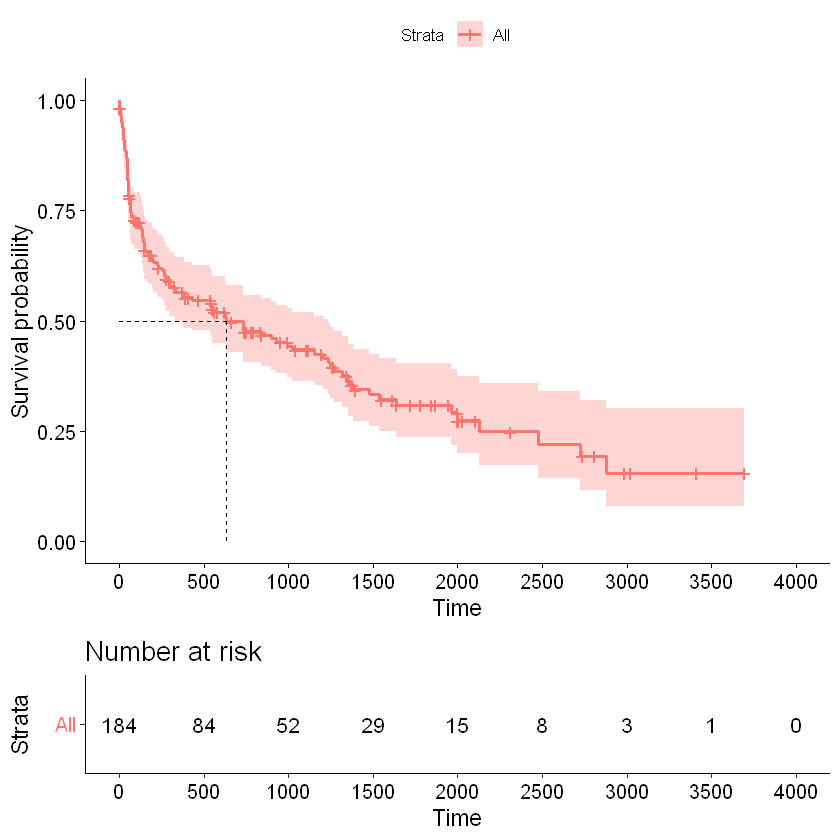

In [8]:
ggsurvplot(km_fit,
           risk.table = TRUE,
           surv.median.line = "hv",
           break.x.by = 500)